
Importing important library to be used




In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [176]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extracting he relevant features that can define a customer churn

In [177]:
CustomerData=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Assignment3/CustomerChurn_dataset.csv')

2. Using EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot



In [178]:
# Displaying the first few rows of the dataset
CustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [179]:
#Checking if there are some missing values
CustomerData.isna().head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [180]:
CustomerData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [181]:
#Checking Data types
CustomerData.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [182]:
CustomerData.shape

(7043, 21)

In [183]:
# Getting the summary statistics of numerical features
CustomerData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [184]:
# Checking the data types of the columns
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [185]:
# Perform one-hot encoding
encodedData = pd.get_dummies(CustomerData)
encodedData

# Combine Churn_No and Churn_Yes columns into a single Churn column
encodedData['Churn'] = encodedData['Churn_Yes']

# Drop Churn_No and Churn_Yes columns
encodedData = encodedData.drop(columns=['Churn_No', 'Churn_Yes'])

In [186]:
encodedData

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


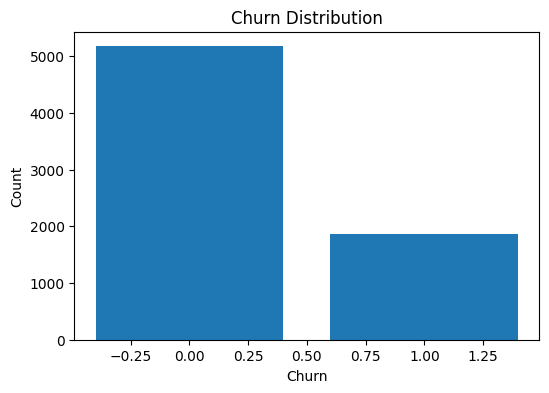

In [187]:
# Count the number of churned and non-churned customers
churn_counts = encodedData['Churn'].value_counts()

# Create a bar plot of churn distribution
plt.figure(figsize=(6, 4))
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

In [188]:
from scipy.stats import spearmanr

# Assuming you have loaded the data into the 'CustomerData' DataFrame
# and 'Churn' is the target variable name

# Calculate Spearman's rank correlation coefficients between 'Churn' and other variables
rank_correlation_coefficients = encodedData.apply(lambda x: spearmanr(x, encodedData['Churn']).correlation).drop('Churn')

# Sort the rank correlation coefficients in descending order
sorted_correlation_coefficients = rank_correlation_coefficients.sort_values(ascending=False)

# Print the sorted rank correlation coefficients
print(sorted_correlation_coefficients)

Contract_Month-to-month                 0.405103
OnlineSecurity_No                       0.342637
TechSupport_No                          0.337281
InternetService_Fiber optic             0.308020
PaymentMethod_Electronic check          0.301919
                                          ...   
DeviceProtection_No internet service   -0.227890
InternetService_No                     -0.227890
OnlineBackup_No internet service       -0.227890
Contract_Two year                      -0.302253
tenure                                 -0.367062
Length: 13618, dtype: float64


In [189]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Split the data into features (X) and target variable (y)
X = encodedData.drop('Churn', axis=1)
y = encodedData['Churn']

# Perform feature selection using chi-squared test
k = 7  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the names of selected features
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'OnlineSecurity_No', 'TechSupport_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [190]:
encodedData.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0002-ORFBO',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn'],
      dtype='object', length=13619)

In [191]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and target variable (y)
X = encodedData.drop('Churn', axis=1)
y = encodedData['Churn']

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)

                             Feature  Importance
1                             tenure    0.073745
2                     MonthlyCharges    0.055032
7078         Contract_Month-to-month    0.030566
7085  PaymentMethod_Electronic check    0.020322
7060               OnlineSecurity_No    0.017851
...                              ...         ...
2943           customerID_4193-IBKSW    0.000000
5464           customerID_7684-XSZIY    0.000000
8192             TotalCharges_1630.4    0.000000
3530           customerID_5003-OKNNK    0.000000
4597           customerID_6479-SZPLM    0.000000

[13618 rows x 2 columns]


In [192]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Split the data into features (X) and target variable (y)
X = encodedData.drop('Churn', axis=1)
y = encodedData['Churn']

# Perform feature selection using chi-squared test
k = 12  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the names of selected features
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')


In [193]:
# Splitting the data into features (X) and target variable (y)
X = encodedData[['tenure', 'MonthlyCharges', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check']]
y = encodedData['Churn']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [194]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

In [196]:
# Define the hidden layers
hidden1 = Dense(64, activation='relu')(input_layer)
hidden2 = Dense(32, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)
hidden4 = Dense(32, activation='relu')(hidden3)
hidden5 = Dense(64, activation='relu')(hidden4)
hidden6 = Dense(32, activation='relu')(hidden5)
hidden7 = Dense(32, activation='relu')(hidden6)
hidden8 = Dense(64, activation='relu')(hidden7)


In [197]:
# Define the output layer
output_layer = Dense(1, activation='sigmoid')(hidden2)

In [198]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

In [199]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [200]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/500
141/141 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7697 - val_loss: 0.4477 - val_accuracy: 0.7728
Epoch 2/500
141/141 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.7985 - val_loss: 0.4470 - val_accuracy: 0.7799
Epoch 3/500
141/141 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8039 - val_loss: 0.4483 - val_accuracy: 0.7711
Epoch 4/500
141/141 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8041 - val_loss: 0.4417 - val_accuracy: 0.7844
Epoch 5/500
141/141 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8021 - val_loss: 0.4449 - val_accuracy: 0.7764
Epoch 6/500
141/141 [==============================] - 1s 4ms/step - loss: 0.4120 - accuracy: 0.8059 - val_loss: 0.4441 - val_accuracy: 0.7835
Epoch 7/500
141/141 [==============================] - 1s 4ms/step - loss: 0.4118 - accuracy: 0.8056 - val_loss: 0.4408 - val_accuracy: 0.7870

In [201]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

45/45 [==============================] - 0s 2ms/step


In [202]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.8f}')
print(f'AUC Score: {auc_score:.8f}')

Accuracy: 0.78069553
AUC Score: 0.81753081


In [203]:
model.save('/content/drive/My Drive/Colab Notebooks/Assignment3/TrainedModel')